Reading EGI header from /Users/ernie/Documents/ExampleData/Chirp/128_Chirp_D0657.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {DIN1} ...
Reading 0 ... 764368  =      0.000 ...   764.368 secs...
Plotting data for: /Users/ernie/Documents/ExampleData/Chirp/128_Chirp_D0657.raw


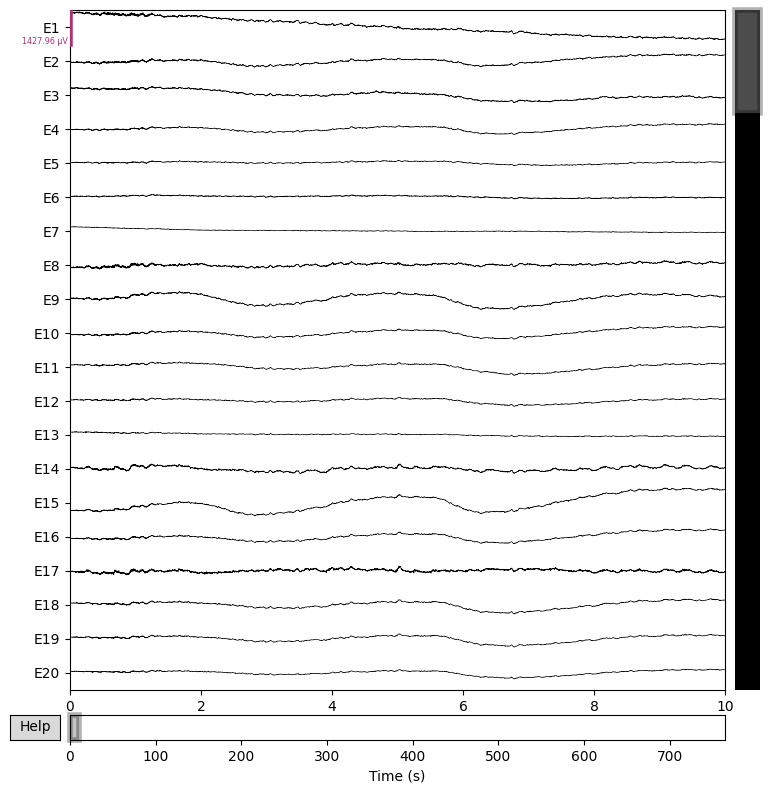

Plotting data for: /Users/ernie/Documents/ExampleData/Chirp/128_Chirp_D0657.raw


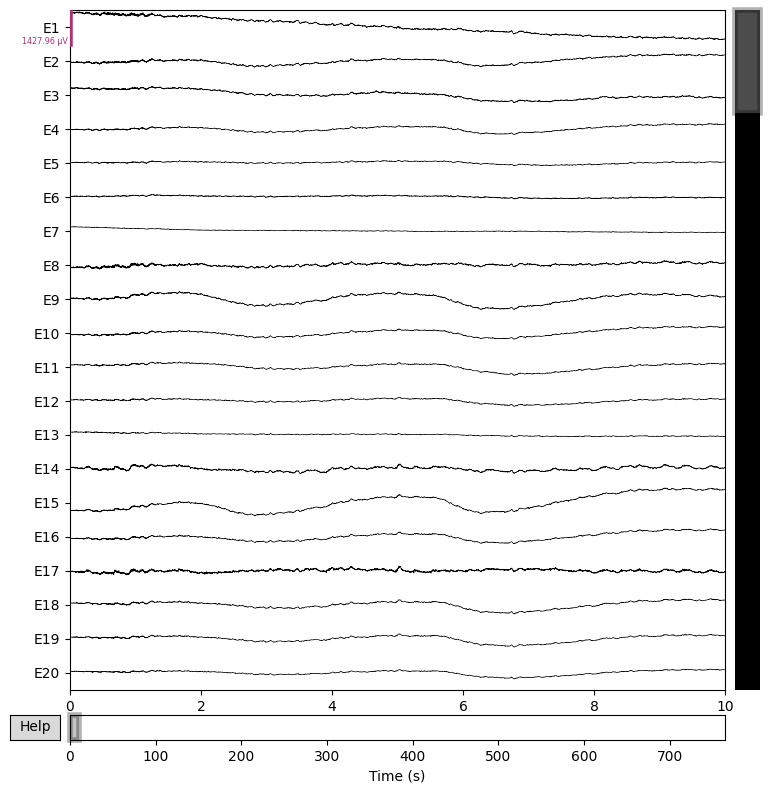

In [ ]:
%matplotlib qt
%gui qt
import ipywidgets as widgets
import os
import mne
from IPython.display import display

selected_file = None  # Global variable to hold the selected file path

def create_file_selector(directory='.', extensions=None):
    """
    Create and return a file selector widget with an extension filter dropdown.
    
    Parameters:
    - directory (str): The directory whose files will be listed in the selector.
    - extensions (list): List of file extensions to filter by.
    
    Returns:
    - widgets.VBox: A widget containing a dropdown for extension filtering and a file selector.
    """
    if extensions is None:
        extensions = ['.raw', '.set']
    
    def on_file_select(change):
        global selected_file
        selected_file = os.path.join(directory, change.new)
        #print(f"Selected file: {selected_file}")  # or use any other way to utilize the selected file path
        global loaded_eeg_data
        if selected_file.endswith('.set'):
            loaded_eeg_data = mne.io.read_raw_eeglab(selected_file, preload=True)
        elif selected_file.endswith('.raw'):
            loaded_eeg_data = mne.io.read_raw_egi(selected_file, preload=True)
        else:
            print("Unsupported file format.")

    def on_extension_select(change):
        ext = change.new
        if ext == 'All':
            filtered_files = all_files
        else:
            filtered_files = [f for f in all_files if f.endswith(ext)]
        file_selector.options = filtered_files
    
            
    all_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    extension_options = ['All'] + extensions
    extension_dropdown = widgets.Dropdown(options=extension_options, value='All', description='Extension:')
    extension_dropdown.observe(on_extension_select, names='value')
    
    file_selector = widgets.Select(
        options=all_files,
        value=None,
        rows=10,
        description='Files:',
        disabled=False,
        layout={'width': '600px'}  # Make the widget wider
    )
    file_selector.observe(on_file_select, names='value')
    
    plot_button = widgets.Button(description="Plot the figure")
    plot_button.on_click(lambda x: plot_selected_file(selected_file))
    
    open_folder_button = widgets.Button(description="Open containing folder")
    open_folder_button.on_click(lambda x: os.system(f'open {os.path.realpath(directory)}'))
    
    return widgets.VBox([extension_dropdown, file_selector, plot_button, open_folder_button])

def plot_selected_file(file_path):
    """
    Plot the selected file if it is loaded, using interactive plotting in Jupyter Notebooks.
    """
    if 'loaded_eeg_data' in globals() and loaded_eeg_data is not None:
        print(f"Plotting data for: {file_path}")
        %matplotlib inline
        loaded_eeg_data.plot(scalings='auto', show=True, block=True)
    else:
        print("No file is loaded for plotting.")
# Example usage
directory = '/Users/ernie/Documents/ExampleData/Chirp'
file_selector_widget = create_file_selector(directory, extensions=['.raw', '.set'])
display(file_selector_widget)
